In [1]:
import os
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

## Example to export Climatologies Rainfal to netcdf

In [2]:
data_dir = '..'+os.sep+'data'+os.sep+'3B42_199901_201212.nc'

In [3]:
data = ca.read_netcdf(data_dir,2)

lat : (110,)
lon : (110,)
time : (168,)
prec : (168, 110, 110)


In [4]:
lat = data['lat']
lon = data['lon']
pre = data['prec']
tim = data['time']

In [5]:
print(f'Rainfall shape : {pre.shape}')
print(f'Latitude shape : {lat.shape}')
print(f'Longitude shape: {lon.shape}')

Rainfall shape : (168, 110, 110)
Latitude shape : (110,)
Longitude shape: (110,)


In [6]:
pre_dictionary = ca.data_dictionary(pre)


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  14
Numbers of months:  168


In [7]:
pre_climatologies = ca.climatology(pre_dictionary)

In [8]:
pre_anomalies = ca.anomalies(pre_dictionary)

In [9]:
print(f'Rainfall Climatologies shape: {pre_climatologies.shape}')
print(f'Rainfall Anomalies shape: {pre_anomalies.shape}')

Rainfall Climatologies shape: (12, 110, 110)
Rainfall Anomalies shape: (168, 110, 110)


In [10]:
lon2d, lat2d = np.meshgrid(lon, lat)

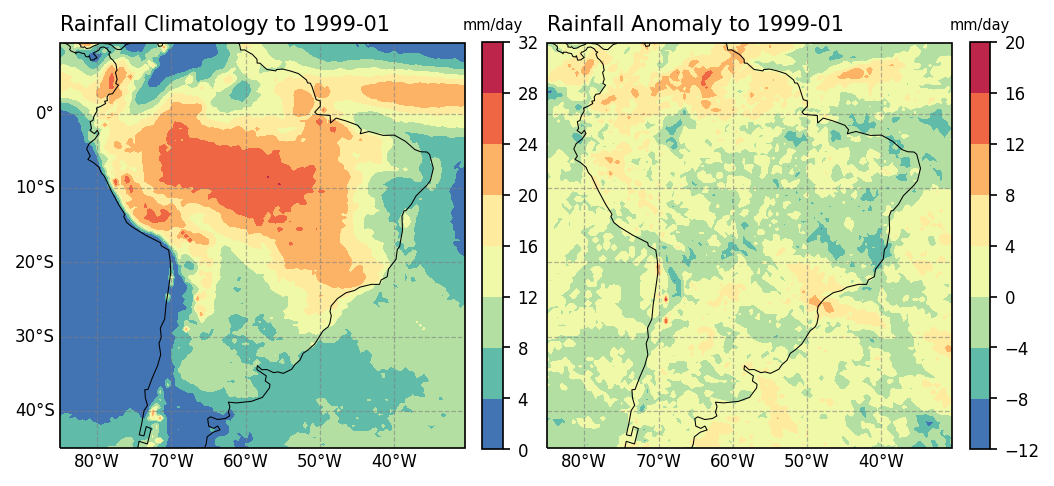

In [11]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

plt.figure(figsize=(8,5),dpi=150)
gs = gridspec.GridSpec(1,2)

ax = plt.subplot(gs[0, 0], projection = proj)
ax.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)

a1 = ax.contourf(lon2d, lat2d, pre_climatologies[0,:,:], cmap = cmap)

gl = ax.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax.set_title('Rainfall Climatology to 1999-01',fontsize=10,loc='left')

cbar = plt.colorbar(a1,orientation='vertical',pad=0.04, fraction=0.046)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_title('mm/day',fontsize=7)

ax = plt.subplot(gs[0, 1], projection = proj)
ax.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)

a1 = ax.contourf(lon2d, lat2d, pre_anomalies[0,:,:], cmap = cmap)

gl = ax.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax.set_title('Rainfall Anomaly to 1999-01',fontsize=10,loc='left')

cbar = plt.colorbar(a1,orientation='vertical',pad=0.04, fraction=0.046)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_title('mm/day',fontsize=7)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.1)

In [12]:
info = {'file': '../data/3B42_199901_201212_climatology.nc', # filename and directory
        'title': 'South America 3B42-v7 Monthly Rainfall Climatologies', # netcdf title
        'year_start':1999,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':1999,'month_end':12,'day_end':1,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'pre', # variable short name
        'var_units': 'mm/day'} # variable units

In [13]:
ca.create_netcdf(info,pre_climatologies,lat,lon)

Time Start: 1999-01-01 00:00:00
Time End: 1999-12-01 00:00:00
Time Frequency: Monthly
Time Lenght: 12

File created in:  ../data/3B42_199901_201212_climatology.nc
File title:  South America 3B42-v7 Monthly Rainfall Climatologies
var title:  pre
var units:  mm/day
